In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py

import numpy as np
import pandas as pd

import glob

In [2]:
metrics = ['rmse', 'ssim', 'avg_abs_error','median_error_max_true','relative_norm']
metrics_names = ['RMSE [-]', 'SSIM [-]', 'Mean Abs\nError [$N/m^2$]','Median Error/\nMax True [-]','Relative Norm']
number_of_metrics = len(metrics)

Unique Models : ['encoder' 'multiscale' 'unet']
models_output\encoder_AR_PINN_MSE_E500.csv
models_output\encoder_L2_E500.csv
models_output\encoder_L2_GDL_E500.csv
models_output\encoder_L2_GDL_MAE_E500.csv
models_output\encoder_PINN_MSE_E500.csv
models_output\encoder_PINN_RES_E500.csv
models_output\multiscale_AR_PINN_MSE_E500.csv
models_output\multiscale_L2_E500.csv
models_output\multiscale_L2_GDL_E500.csv
models_output\multiscale_L2_GDL_MAE_E500.csv
models_output\multiscale_PINN_MSE_E500.csv
models_output\multiscale_PINN_RES_E500.csv
models_output\unet_AR_PINN_MSE_E500.csv
models_output\unet_L2_E500.csv
models_output\unet_L2_GDL_E500.csv
models_output\unet_L2_GDL_MAE_E500.csv
models_output\unet_PINN_MSE_E500.csv
models_output\unet_PINN_RES_E500.csv
models_output\encoder_AR_PINN_MSE_E500.csv
models_output\encoder_L2_E500.csv
models_output\encoder_L2_GDL_E500.csv
models_output\encoder_L2_GDL_MAE_E500.csv
models_output\encoder_PINN_MSE_E500.csv
models_output\encoder_PINN_RES_E500.csv
mode

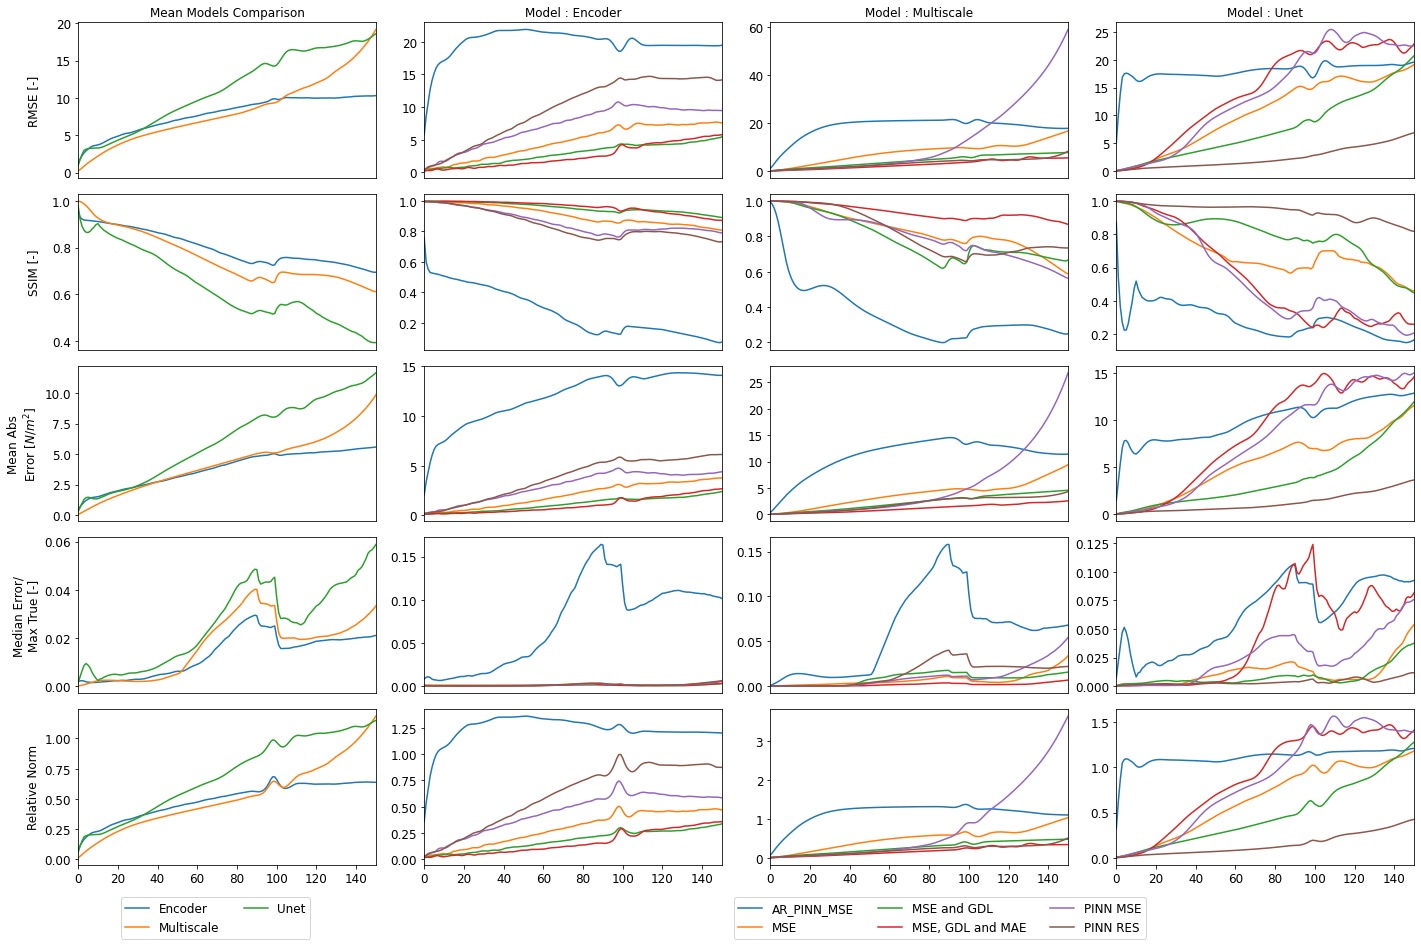

In [3]:
unique_models = []
for path in glob.glob(f'models_output/*.csv'):
    unique_models.append(path.split('\\')[1].split('_')[0])

list_unique_models = np.unique(np.array(unique_models))
print('Unique Models :',list_unique_models)

fig, axs = plt.subplots(number_of_metrics,4,figsize=((len(list_unique_models)+1)*5,number_of_metrics*2.5),squeeze=False)

for row, metric in enumerate(metrics):
    #print(metric)
    for col, model in enumerate(list_unique_models):
        df_norm = pd.DataFrame()

        for path in glob.glob(f'models_output/{model}*.csv'):

            print(path)

            #print(path)
            df = pd.read_csv(path,index_col=0)
            df_norm[path.split("\\")[1].split('.')[0]] = df[metric]

        axs[row,col+1].plot(df_norm)
        axs[row,col+1].tick_params(labelsize=12)
        axs[row,col+1].set_xlim(0,150)
        #axs[row,col+1].legend(df_norm.columns)

        axs[row,0].plot(df_norm.mean(axis=1),label=model)
        axs[row,0].tick_params(labelsize=12)
        axs[row,0].set_xlim(0,150)
        #axs[row,0].legend()

# Set LabelMetric
for row, metric in enumerate(metrics_names):
   axs[row,0].set_ylabel(metric, fontsize=12)

# Remove x-ticks
for row in range(len(metrics)-1):
    for column in range(len(list_unique_models)+1):
        axs[row,column].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Set ModelName
for col, model_name in enumerate(list_unique_models):
    axs[0,col+1].set_title(f"Model : {model_name.capitalize()}")

# Set TitleName
axs[0,0].set_title('Mean Models Comparison')

fig.align_ylabels()
plt.tight_layout()

# Set Legend - Left
axs[-1,0].legend(labels=[model.capitalize() for model in list_unique_models], bbox_to_anchor=(0.8, -0.17),ncol=2,fontsize=12)

# Set Legend - Right
axs[-1,-1].legend(labels=['AR_PINN_MSE','MSE','MSE and GDL','MSE, GDL and MAE','PINN MSE','PINN RES'], bbox_to_anchor=(0.12, -0.17),ncol=3,fontsize=12)

#plt.savefig('homogeneous_metrics_training.pdf',bbox_inches='tight')

In [4]:
# Tables
for _i, metric in enumerate(metrics):
    print(metric)
    df_norm = pd.DataFrame()

    for model in ['Unet','Encoder','Multiscale']:
        for path in glob.glob(f'model_comparison/{model}_*.csv'):

            name = ' '.join(path.split("\\")[1].split('.')[0].split('_')[1:-1])

            df = pd.read_csv(path,index_col=0)

            df_norm.loc[name,model] = np.format_float_scientific(df[metric].mean(),precision=2)
    df_norm.to_csv(f'models_output/CSV_Tables/{metric}.csv')

rmse
ssim
avg_abs_error
median_error_max_true
relative_norm


Unique Models : ['encoder' 'multiscale' 'unet']
models_output\encoder_AR_PINN_MSE_E500.csv
models_output\encoder_L2_E500.csv
models_output\encoder_L2_GDL_E500.csv
models_output\encoder_L2_GDL_MAE_E500.csv
models_output\encoder_PINN_MSE_E500.csv
models_output\encoder_PINN_RES_E500.csv
models_output\multiscale_AR_PINN_MSE_E500.csv
models_output\multiscale_L2_E500.csv
models_output\multiscale_L2_GDL_E500.csv
models_output\multiscale_L2_GDL_MAE_E500.csv
models_output\multiscale_PINN_MSE_E500.csv
models_output\multiscale_PINN_RES_E500.csv
models_output\unet_AR_PINN_MSE_E500.csv
models_output\unet_L2_E500.csv
models_output\unet_L2_GDL_E500.csv
models_output\unet_L2_GDL_MAE_E500.csv
models_output\unet_PINN_MSE_E500.csv
models_output\unet_PINN_RES_E500.csv


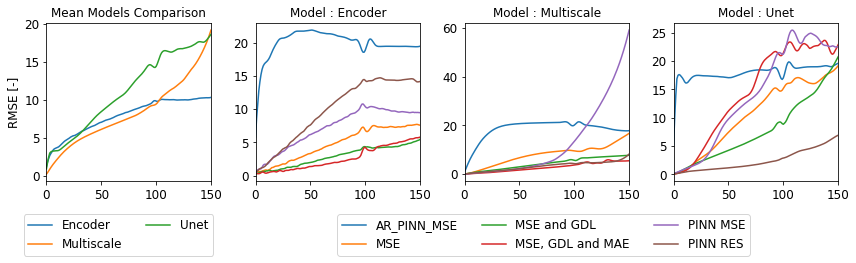

In [5]:
metrics = ['rmse']
metrics_names = ['RMSE [-]']
number_of_metrics = len(metrics)

unique_models = []
for path in glob.glob(f'models_output/*.csv'):
    unique_models.append(path.split('\\')[1].split('_')[0])

list_unique_models = np.unique(np.array(unique_models))
print('Unique Models :',list_unique_models)

fig, axs = plt.subplots(number_of_metrics,4,figsize=((len(list_unique_models)+1)*3,number_of_metrics*3),squeeze=False)

for row, metric in enumerate(metrics):
    #print(metric)
    for col, model in enumerate(list_unique_models):
        df_norm = pd.DataFrame()

        for path in glob.glob(f'models_output/{model}*.csv'):

            print(path)

            #print(path)
            df = pd.read_csv(path,index_col=0)
            df_norm[path.split("\\")[1].split('.')[0]] = df[metric]

        axs[row,col+1].plot(df_norm)
        axs[row,col+1].tick_params(labelsize=12)
        axs[row,col+1].set_xlim(0,150)
        #axs[row,col+1].legend(df_norm.columns)

        axs[row,0].plot(df_norm.mean(axis=1),label=model)
        axs[row,0].tick_params(labelsize=12)
        axs[row,0].set_xlim(0,150)
        #axs[row,0].legend()

# Set LabelMetric
for row, metric in enumerate(metrics_names):
   axs[row,0].set_ylabel(metric, fontsize=12)

# Remove x-ticks
for row in range(len(metrics)-1):
    for column in range(len(list_unique_models)+1):
        axs[row,column].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Set ModelName
for col, model_name in enumerate(list_unique_models):
    axs[0,col+1].set_title(f"Model : {model_name.capitalize()}")

# Set TitleName
axs[0,0].set_title('Mean Models Comparison')

fig.align_ylabels()
plt.tight_layout()

# Set Legend - Left
axs[-1,0].legend(labels=[model.capitalize() for model in list_unique_models], bbox_to_anchor=(1.05, -0.17),ncol=2,fontsize=12)

# Set Legend - Right
axs[-1,-1].legend(labels=['AR_PINN_MSE','MSE','MSE and GDL','MSE, GDL and MAE','PINN MSE','PINN RES'], bbox_to_anchor=(0.5, -0.17),ncol=3,fontsize=12)

#plt.savefig('homogeneous_training_RMSE.pdf',dpi=300,bbox_inches='tight')